#### About Yulu:
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

#### Business Problem:
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [95]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
#importing/reading the data
data=pd.read_csv("yulu_data.csv")

In [97]:
data.head() #the first five rows and columns

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [98]:
data.info() #basic information of nulls,counts and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [99]:
#statistical information
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [100]:
data.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [101]:
#dimensionality of the DataFrame
data.shape

(10886, 12)

In [102]:
#sum of null data for all the attributes
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [103]:
#converting datetime attribute to datatype datetime
data['datetime'] = pd.to_datetime(data['datetime'])

In [104]:
#converting attributes to object and int datatype wherever necessary
data["season"]=data["season"].astype("object")
data["holiday"]=data["holiday"].astype("object")
data["workingday"]=data["workingday"].astype("object")
data["weather"]=data["weather"].astype("object")
data["count"]=data["count"].astype("int64")

In [105]:
#datatypes after conversion
data.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [106]:
#creating a table of varialbles and their counts grouped together
category_val=["season","holiday","workingday","weather"]
data[category_val].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [107]:
#checking if data is duplicated
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [108]:
#checking unique values for attributes
data.season.unique()

array([1, 2, 3, 4], dtype=object)

In [109]:
data.holiday.unique()

array([0, 1], dtype=object)

In [110]:
data.weather.unique()

array([1, 2, 3, 4], dtype=object)

In [111]:
data.workingday.unique()

array([0, 1], dtype=object)

<AxesSubplot:xlabel='temp', ylabel='Count'>

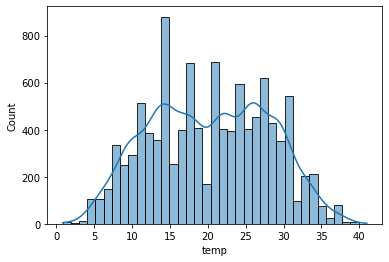

In [112]:
#Univariate Analysis
sns.histplot(data=data,x="temp",kde=True)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

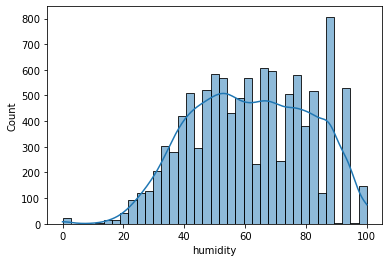

In [113]:
sns.histplot(data=data,x="humidity",kde=True)

<AxesSubplot:xlabel='atemp', ylabel='Count'>

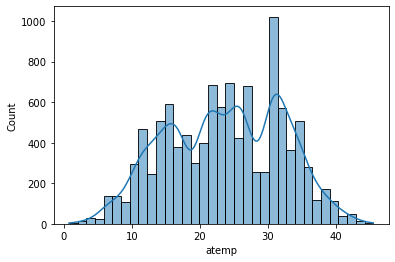

In [114]:
sns.histplot(data=data,x="atemp",kde=True)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

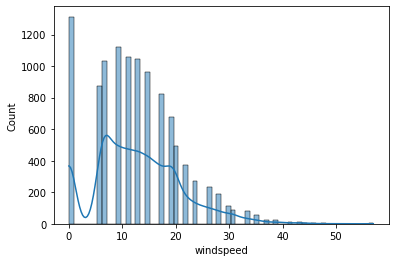

In [115]:
sns.histplot(data=data,x="windspeed",kde=True)

<AxesSubplot:xlabel='casual', ylabel='Count'>

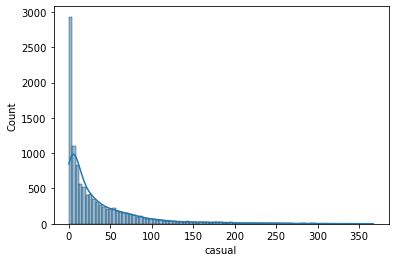

In [116]:
sns.histplot(data=data,x="casual",kde=True)

<AxesSubplot:xlabel='registered', ylabel='Count'>

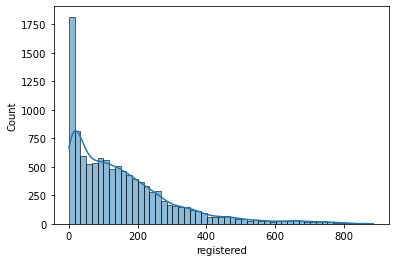

In [117]:
sns.histplot(data=data,x="registered",kde=True)

<AxesSubplot:ylabel='temp'>

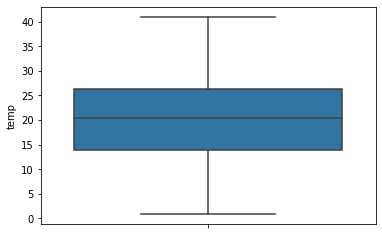

In [118]:
#box-plots to detect outliers in the data
sns.boxplot(data=data, y="temp")

<AxesSubplot:ylabel='humidity'>

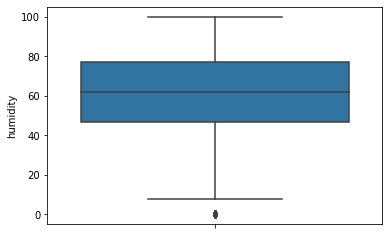

In [119]:
sns.boxplot(data=data, y="humidity")

<AxesSubplot:ylabel='atemp'>

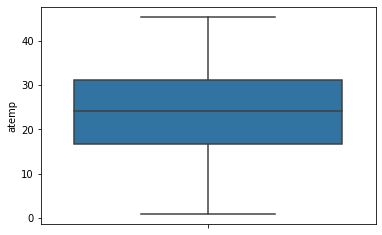

In [120]:
sns.boxplot(data=data, y="atemp")

<AxesSubplot:ylabel='casual'>

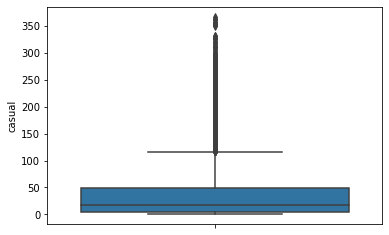

In [121]:
sns.boxplot(data=data, y="casual")

<AxesSubplot:ylabel='registered'>

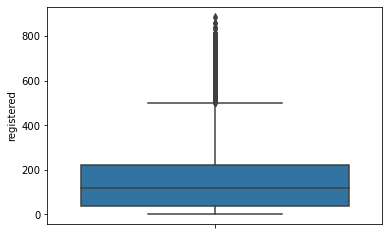

In [122]:
sns.boxplot(data=data, y="registered")

<AxesSubplot:ylabel='count'>

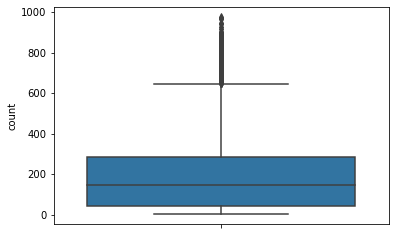

In [123]:
sns.boxplot(data=data, y="count")

<AxesSubplot:ylabel='windspeed'>

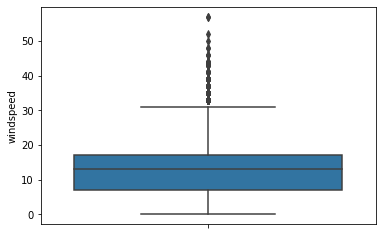

In [124]:
sns.boxplot(data=data, y="windspeed")

In [125]:
#humidity, casual, registered and count have outliers in the data.

In [126]:
#Count-Plots and Bi-Variate Analysis

<AxesSubplot:xlabel='workingday', ylabel='count'>

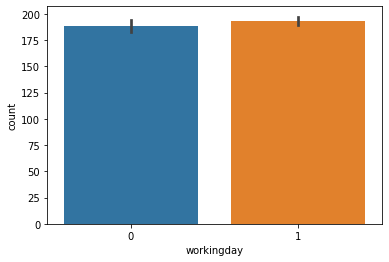

In [127]:
sns.barplot(x='workingday', y='count', data=data)

<AxesSubplot:xlabel='holiday', ylabel='count'>

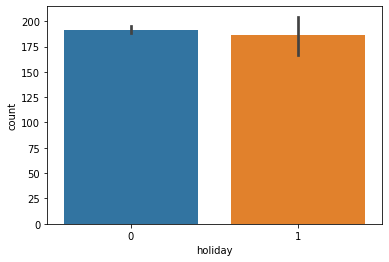

In [128]:
sns.barplot(x='holiday', y='count', data=data)

<AxesSubplot:xlabel='season', ylabel='count'>

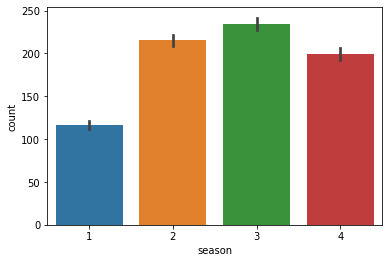

In [129]:
sns.barplot(x='season', y='count', data=data)

<AxesSubplot:xlabel='weather', ylabel='count'>

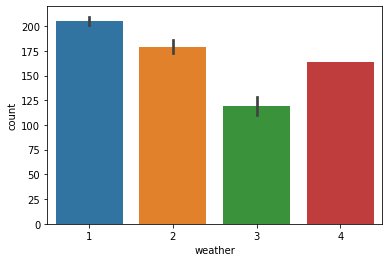

In [130]:
sns.barplot(x='weather', y='count', data=data)

<AxesSubplot:xlabel='season', ylabel='count'>

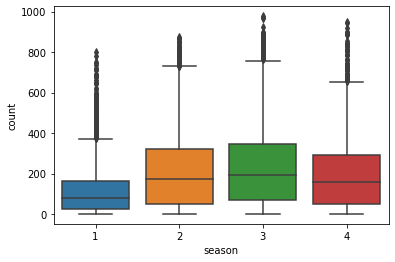

In [131]:
sns.boxplot(data=data,x="season",y="count")

<AxesSubplot:xlabel='holiday', ylabel='count'>

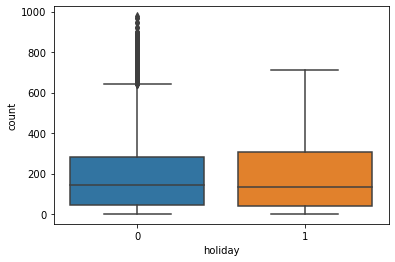

In [132]:
sns.boxplot(data=data,x="holiday",y="count")

<AxesSubplot:xlabel='workingday', ylabel='count'>

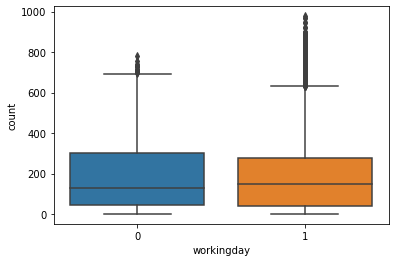

In [133]:
sns.boxplot(data=data,x="workingday",y="count")

<AxesSubplot:xlabel='weather', ylabel='count'>

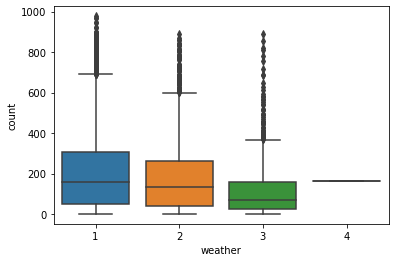

In [134]:
sns.boxplot(data=data,x="weather",y="count")

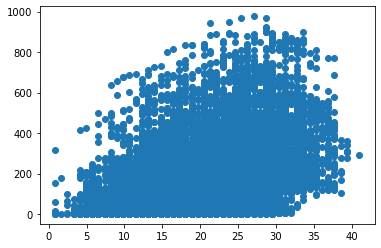

In [135]:
plt.scatter(data["temp"],data["count"])

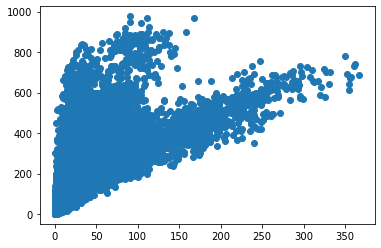

In [136]:
plt.scatter(data["casual"],data["count"])

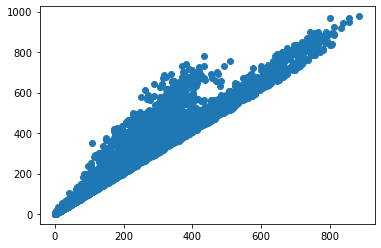

In [137]:
plt.scatter(data["registered"],data["count"])

<AxesSubplot:xlabel='temp', ylabel='count'>

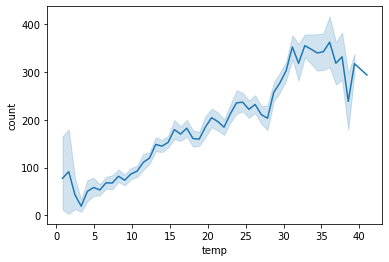

In [138]:
sns.lineplot(x='temp',y='count',data=data)

<AxesSubplot:xlabel='temp', ylabel='humidity'>

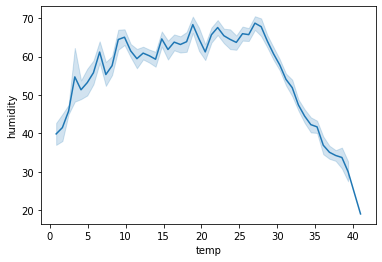

In [139]:
sns.lineplot(x='temp',y='humidity',data=data)

<AxesSubplot:xlabel='temp', ylabel='windspeed'>

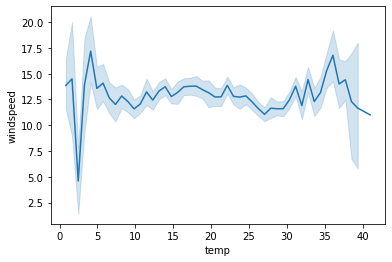

In [140]:
sns.lineplot(x='temp',y='windspeed',data=data)

In [141]:
#Outliers for different attributes -- (count,casual,registered,windspeed,humidity)
q1=data["count"].quantile(0.25)
q3=data["count"].quantile(0.75)
iqr=q3-q1
outliers=data[(data["count"]<q1-1.5*iqr)|(data["count"]>q3+1.5*iqr)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662


In [142]:
q1=data["casual"].quantile(0.25)
q3=data["casual"].quantile(0.75)
iqr=q3-q1
outliers=data[(data["casual"]<q1-1.5*iqr)|(data["casual"]>q3+1.5*iqr)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1173,2011-03-13 14:00:00,1,0,0,1,18.86,22.725,41,19.9995,144,106,250
1174,2011-03-13 15:00:00,1,0,0,1,19.68,23.485,39,22.0028,149,155,304
1175,2011-03-13 16:00:00,1,0,0,1,18.86,22.725,41,26.0027,124,132,256
1311,2011-03-19 12:00:00,1,0,0,1,18.86,22.725,33,27.9993,126,141,267
1312,2011-03-19 13:00:00,1,0,0,1,20.50,24.240,34,31.0009,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2012-12-08 12:00:00,4,0,0,2,16.40,20.455,87,15.0013,122,364,486
10611,2012-12-08 13:00:00,4,0,0,2,16.40,20.455,87,11.0014,148,399,547
10612,2012-12-08 14:00:00,4,0,0,2,16.40,20.455,87,19.0012,164,378,542
10613,2012-12-08 15:00:00,4,0,0,1,17.22,21.210,82,11.0014,167,374,541


In [143]:
q1=data["registered"].quantile(0.25)
q3=data["registered"].quantile(0.75)
iqr=q3-q1
outliers=data[(data["registered"]<q1-1.5*iqr)|(data["registered"]>q3+1.5*iqr)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1987,2011-05-09 17:00:00,2,0,1,1,25.42,31.060,38,16.9979,59,539,598
2011,2011-05-10 17:00:00,2,0,1,1,26.24,31.060,33,0.0000,79,532,611
2059,2011-05-12 17:00:00,2,0,1,2,26.24,31.060,57,12.9980,54,540,594
2179,2011-05-17 17:00:00,2,0,1,1,25.42,30.305,65,27.9993,83,521,604
2371,2011-06-06 17:00:00,2,0,1,1,31.98,34.090,33,19.0012,63,516,579
...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562


In [144]:
q1=data["windspeed"].quantile(0.25)
q3=data["windspeed"].quantile(0.75)
iqr=q3-q1
outliers=data[(data["windspeed"]<q1-1.5*iqr)|(data["windspeed"]>q3+1.5*iqr)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218


In [145]:
q1=data["humidity"].quantile(0.25)
q3=data["humidity"].quantile(0.75)
iqr=q3-q1
outliers=data[(data["humidity"]<q1-1.5*iqr)|(data["humidity"]>q3+1.5*iqr)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


In [146]:
#dropping the datetime column as it is not necessary with the analysis here on
data.drop(["datetime"],axis="columns")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [147]:
#Describing the count attribute, which is going to be necessary. As we have 300 outliers in the count attribute in the data on 10886, we'll not drop the outliers
data.describe()[["count"]]

,count
count,10886.000000
mean,191.574132
std,181.144454
min,1.000000
25%,42.000000
50%,145.000000
75%,284.000000
max,977.000000


In [148]:
data.corr()["count"]

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<AxesSubplot:>

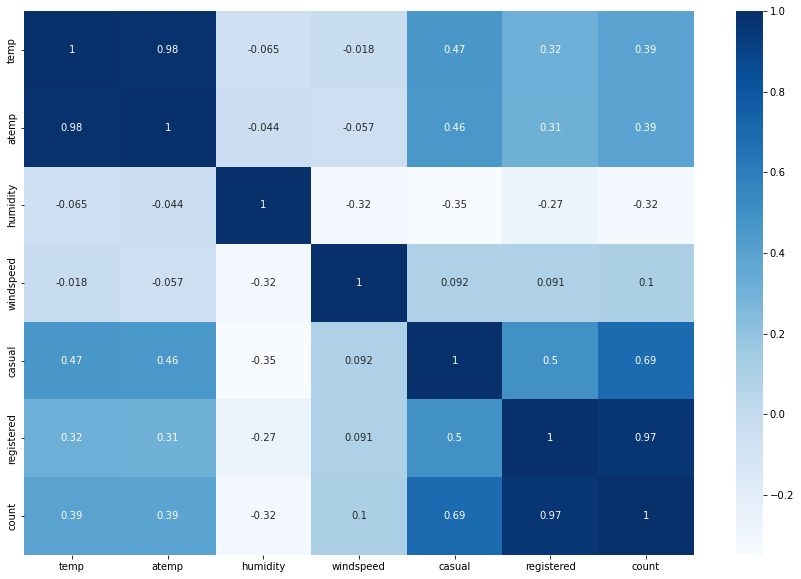

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

### Hypothesis Testing
### 2- Sample T-Test to check if working day has an effect on the number of electric cycles rented 
### #1:Null and alternative hypothesis
#### Null hypothesis: Number of cycles hired on a weekday is equal to the number of cycles hired on a weekend
#### Alternate Hypothesis: count on weekday is not equal to count on the weekend
### #2:   α = 0.05
#### If p-value is less than alpha reject the null hypothesis.
#### Standard deviation of the population is not known ,will perform a T-test.
#### 𝐻0 : 𝜇1 = 𝜇2
#### 𝐻𝑎: 𝜇1 != 𝜇2

In [150]:
data.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [151]:
from scipy.stats import ttest_ind
workingday1=data[data["workingday"]==1]["count"]
non_workingday=data[data["workingday"]==0]["count"]

In [152]:
#Prior to the two-sample T-Test, the given data groups need to have the same variance.
#If the ratio of the larger data and smaller data is less than 4:1 then the given data have equal variance
np.var(workingday1), np.var(non_workingday)

(34040.697106746935, 30171.34609894243)

In [153]:
#Here, the ratio is 34040.6971 / 30171.3460 which is less than 4:1

In [154]:
ttest_ind(a=workingday1, b=non_workingday, equal_var=True)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

In [155]:
#since the p-value (0.22644) is > alpha(0.05), the null hypothesis of the test canot be rejected. There is no sufficient evidence to say that working day has any effect on electric cycles rented.

## ANNOVA to check if no. of cycles rented is similar or different in different 1. weather 2. season

In [156]:
#Since N>5000, Shapiro might not be accurate, so using histogram we can see if the data is normally distributed

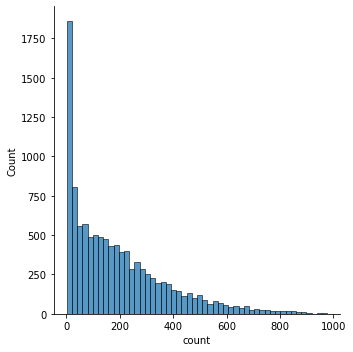

In [157]:
sns.displot(data['count'],bins=50)

In [158]:
 #it is seen from the distplot that the data for count is not normally distributed, using qqplot to double check the normality of the data.

C:\Users\Juee\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


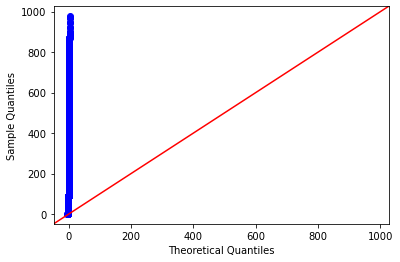

In [161]:
#Checking for equal variance
data.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [162]:
data.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [163]:
#ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season
from scipy.stats import f_oneway
weather_1 = data[data['weather']==1]['count'].values
weather_2 = data[data['weather']==3]['count'].values
weather_3 = data[data['weather']==3]['count'].values
weather_4 = data[data['weather']==4]['count'].values
season_1 = data[data['season']==1]['count'].values
season_2 = data[data['season']==2]['count'].values
season_3 = data[data['season']==3]['count'].values
season_4 = data[data['season']==4]['count'].values

In [164]:
f_oneway(weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4)

F_onewayResult(statistic=146.7166287507321, pvalue=6.062741015744446e-212)

In [ ]:
#p-value is lower than alpha, we reject the null hypothesis
## Number of cycles rented is not similar in different weather and season

## Chi-square test 
#### to check if Weather is dependent on the season 
#### Null Hypothesis: Weather is independent of the season
#### Alternate Hypothesis: Weather is not independent of the season
#### Significance level (alpha): 0.05

In [76]:
contigency= pd.crosstab(data.weather, data.season)
contigency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [78]:
from scipy.stats import chi2_contingency
chi2, pval, dof, exp_freq = chi2_contingency(contigency)

In [81]:
print("chi2:", chi2)
print("p-value:",pval) 
print("dof:",dof)
print("exp_freq:",exp_freq)

chi2: 46.101457310732485
p-value: 2.8260014509929403e-08
dof: 6
exp_freq: [[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]


In [ ]:
#P-Value is low.
#Null hypothesis is rejected